<a href="https://colab.research.google.com/github/sbogde/pandamonium/blob/main/WS02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(614, 13)
    Loan_ID Gender Married Dependents Education Self_Employed  \
0  LP001002   Male      No          0  Graduate            No   
1  LP001003   Male     Yes          1  Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----

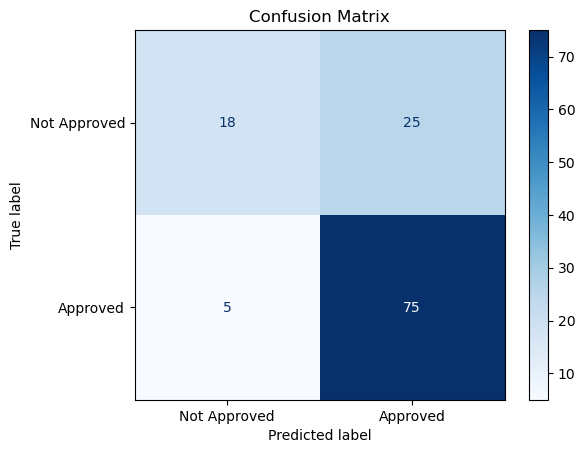


📌 Classification Report:

              precision    recall  f1-score   support

           0       0.78      0.42      0.55        43
           1       0.75      0.94      0.83        80

    accuracy                           0.76       123
   macro avg       0.77      0.68      0.69       123
weighted avg       0.76      0.76      0.73       123



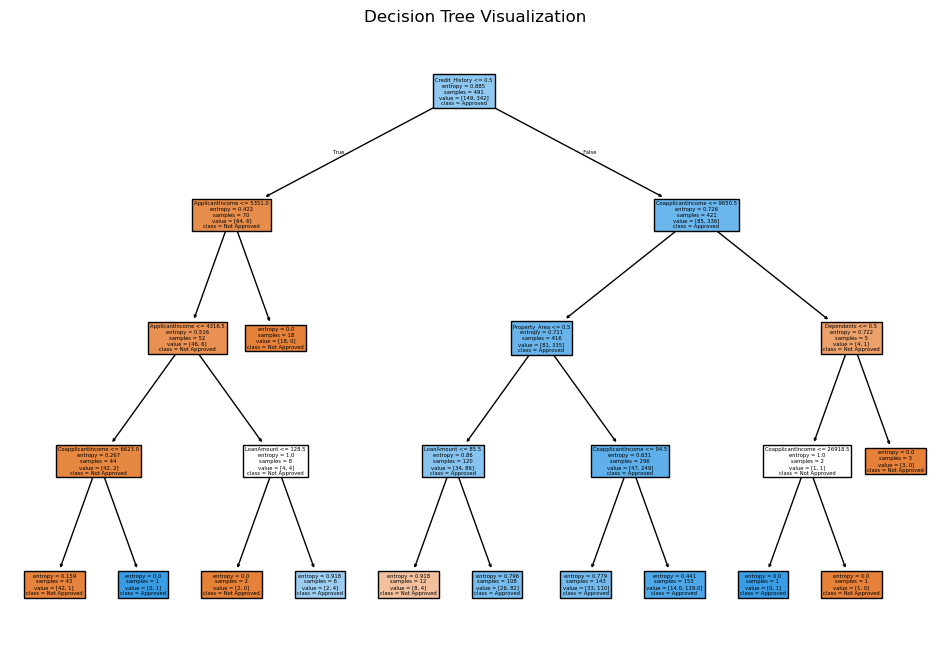

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# ---- Step 1: Load the Dataset ----
file_path = "train_ctrUa4K.csv"  # Update the path if needed
data = pd.read_csv(file_path)

# Displaying dataset info
print(data.shape)
print(data.head(2))
print(data.keys())
print(data.info())
print(data.isnull().sum())

# ---- Step 2: Handle Missing Values (Fixed) ----
# Fill missing values in numerical columns with their mean
data = data.assign(
    LoanAmount=data['LoanAmount'].fillna(data['LoanAmount'].mean()),
    Loan_Amount_Term=data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean()),
    Credit_History=data['Credit_History'].fillna(data['Credit_History'].mode()[0])
)

# Fill missing categorical values with the mode
categorical_columns = ['Gender', 'Married', 'Dependents', 'Self_Employed']
for col in categorical_columns:
    data[col] = data[col].fillna(data[col].mode()[0])

# ---- Step 3: Encode Categorical Variables ----
label_enc = LabelEncoder()
for col in categorical_columns + ['Education', 'Property_Area', 'Loan_Status']:
    data[col] = label_enc.fit_transform(data[col])

# ---- Step 4: Feature Selection ----
X = data.drop(columns=['Loan_ID', 'Loan_Status'])  # Remove Loan_ID & target variable
y = data['Loan_Status']  # Target variable (Loan Approved: 1, Not Approved: 0)

# ---- Step 5: Split Data into Training & Testing Sets ----
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---- Step 6: Train Decision Tree Classifier ----
dt_classifier = DecisionTreeClassifier(criterion="entropy", max_depth=4, random_state=42)
dt_classifier.fit(X_train, y_train)

# ---- Step 7: Model Predictions ----
y_pred = dt_classifier.predict(X_test)

# ---- Step 8: Model Evaluation ----
accuracy = accuracy_score(y_test, y_pred)
print(f"\n📌 Model Accuracy: {accuracy:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Not Approved", "Approved"])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("\n📌 Classification Report:\n")
print(classification_report(y_test, y_pred))

# ---- Step 9: Visualizing Decision Tree ----
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(dt_classifier, feature_names=X.columns, class_names=["Not Approved", "Approved"], filled=True)
plt.title("Decision Tree Visualization")
plt.show()
